<a href="https://colab.research.google.com/github/dmunozbe/TFM_DataScience/blob/main/TFM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Carga del conjunto de datos


Cargamos en un dataframe el dataset del paro en la ciudad de Barcelona

In [106]:
# Importamos las librerias necesarias
#import requests
#import os
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import geopandas as gpd

In [107]:
def cargar_csv(ruta):
    try:
        # Cargar el archivo CSV en un DataFrame de pandas
        dataframe = pd.read_csv(ruta)
        return dataframe
    except Exception as e:
        print("Error al cargar el archivo CSV:", e)
        return None

In [108]:
# Ruta al archivo CSV
ruta_csv = "/content/drive/MyDrive/UOC/TFM/Datasets Indicadores/Básico/Economía/2022_atur_per_sexe.csv"

# Llamar a la función para cargar el CSV
datos = cargar_csv(ruta_csv)

In [109]:
# Mostramos las primeras filas del dataframe
print(datos.head())

    Any  Mes  Codi_Districte Nom_Districte  Codi_Barri  \
0  2022    1               1  Ciutat Vella           1   
1  2022    1               1  Ciutat Vella           2   
2  2022    1               1  Ciutat Vella           3   
3  2022    1               1  Ciutat Vella           4   
4  2022    1               2      Eixample           5   

                               Nom_Barri   Sexe Demanda_ocupacio  Nombre  
0                               el Raval  Dones   Atur Registrat    1350  
1                         el Barri Gòtic  Dones   Atur Registrat     383  
2                         la Barceloneta  Dones   Atur Registrat     439  
3  Sant Pere, Santa Caterina i la Ribera  Dones   Atur Registrat     603  
4                          el Fort Pienc  Dones   Atur Registrat     565  


# 2. EDA: Análisis Exploratorio de Datos

In [110]:
print('Cantidad de Filas y columnas:',datos.shape)
print('Nombre columnas:',datos.columns)

Cantidad de Filas y columnas: (3552, 9)
Nombre columnas: Index(['Any', 'Mes', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri',
       'Nom_Barri', 'Sexe', 'Demanda_ocupacio', 'Nombre'],
      dtype='object')


In [111]:
# Observamos el numero y los nombres de los atributos, el numero de filas y si hay missing-values o no
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3552 entries, 0 to 3551
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Any               3552 non-null   int64 
 1   Mes               3552 non-null   int64 
 2   Codi_Districte    3552 non-null   int64 
 3   Nom_Districte     3552 non-null   object
 4   Codi_Barri        3552 non-null   int64 
 5   Nom_Barri         3552 non-null   object
 6   Sexe              3552 non-null   object
 7   Demanda_ocupacio  3552 non-null   object
 8   Nombre            3552 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 249.9+ KB


El dataset se compone de un total de 9 columnas:
*   **Any:** Año en el que se recogieron los datos
*   **Mes:** Mes en el que se recogieron los datos
*   **Codi_Districte:** Codigo del distrito de Barcelona
*   **Nom_Districte:** Nombre del distrito de Barcelona
*   **Codi_Barri:** Codigo del barrio de Barcelona
*   **Nom_Barri:** Nombre del barrio de Barcelona
*   **Sexe:** Sexo de las personas
*   **Demanda_ocupacio:** Demanda de la ocupacion de trabajadores
*   **Numbre:** Cantidad de personas

El dataset tiene un total de 3552 filas y missing-values


In [112]:
# Analizamos las variables numericas
datos.describe()

,Any,Mes,Codi_Districte,Codi_Barri,Nombre
count,3552.0,3552.000000,3552.000000,3552.000000,3552.000000
mean,2022.0,6.500000,7.500000,37.837838,278.018863
std,0.0,3.452539,11.063117,22.121974,256.180521
min,2022.0,1.000000,1.000000,1.000000,2.000000
25%,2022.0,3.750000,4.000000,19.000000,95.000000
50%,2022.0,6.500000,7.000000,37.500000,193.000000
75%,2022.0,9.250000,8.000000,56.000000,396.250000
max,2022.0,12.000000,99.000000,99.000000,1689.000000


Analizando cada una de las variables numericas vemos que la variable:
*   **Any:** es integra y contiene la información correcta.
*   **Mes:** es integra y contiene la información correcta.
*   **Codi_Districte:** aunque es una variable numerica corresponde con valores categoricos. Por otro lado vemos que puede haber algun valor que no es correcto. Barcelona se compone de 10 distritos, y en cambio como valor maximo nos aparece 99.
*   **Codi_Barri:** aunque es una variable numerica corresponde con valores categoricos. Por otro lado vemos que puede haber algun valor que no es correcto. Barcelona se compone de 73 barrios, y en cambio como valor maximo nos aparece 99
*   **Mombre:** es integra y contiene la información correcta.


In [113]:
# Ahondamos en los distritos mirando el codigo y el nombre del distrito, obteniendo un dataset unicamente con estas dos columnas
distritos = datos[['Codi_Districte','Nom_Districte']]

# Agrupamos por codigo y nombre de distrito
distritosAgrup=distritos.groupby(['Codi_Districte','Nom_Districte'])

# Realizamos un conteo de cada codigo de distrito
distritosAgrup=distritosAgrup['Codi_Districte'].count()

print(distritosAgrup)

Codi_Districte  Nom_Districte      
1               Ciutat Vella           192
2               Eixample               288
3               Sants-Montjuïc         384
4               Les Corts              144
5               Sarrià-Sant Gervasi    288
6               Gràcia                 240
7               Horta-Guinardó         528
8               Nou Barris             624
9               Sant Andreu            336
10              Sant Martí             480
99              No consta               48
Name: Codi_Districte, dtype: int64


Se observa que el Codi_Districte = 99 es un missing value, por lo que se descartaran estos valores del conjunto de datos, eliminando 48 filas

In [114]:
# Filtramos el dataset datos, para quedarnos con todas aquellas filas que tienen un Codi_Districte diferente a 99
datosFiltrados = datos[datos['Codi_Districte']!=99]

print('Cantidad de Filas y columnas:',datosFiltrados.shape)
print('Nombre columnas:',datosFiltrados.columns)

Cantidad de Filas y columnas: (3504, 9)
Nombre columnas: Index(['Any', 'Mes', 'Codi_Districte', 'Nom_Districte', 'Codi_Barri',
       'Nom_Barri', 'Sexe', 'Demanda_ocupacio', 'Nombre'],
      dtype='object')


Despues de estos primeros pasos, hemos pasado de un dataframe de 3552 filas a 3504

# 3. Análisis de los datos

Requisitos a tener en cuenta antes de realizar el analisis de datos:
1.   La informacion de personas en paro por Barrio, no es relevante para este TFM, por lo que se debera agrupar la información por distrito
2.   El indicador 1 de la ISO-37120, "tasa de desempleo" no distingue entre sexos, por lo que se debera agrupar la información omitiendo la variable sexe
3.   El indicador 1 de la ISO-37120, "tasa de desempleo" no distingue entre personas registradas en el paro o que demandan trabajo, por lo que se debera agrupar la información omitiendo la variable demanda_ocupacio.


In [115]:
# De acuerdo con los puntos 1, 2 y 3 obtenemos un dataframe sin las varriables de Codi_Barri y Nom_Barri, Sexe y Demanda_ocupacio
datosAtur=datosFiltrados[['Any','Mes','Codi_Districte','Nom_Districte','Nombre']]
datosAtur.head()

,Any,Mes,Codi_Districte,Nom_Districte,Nombre
0,2022,1,1,Ciutat Vella,1350
1,2022,1,1,Ciutat Vella,383
2,2022,1,1,Ciutat Vella,439
3,2022,1,1,Ciutat Vella,603
4,2022,1,2,Eixample,565


In [116]:
# Agrupamos por Any, Mes, Codi_Districte y Nom_Districte
datosAturAgrup = datosAtur.groupby(['Codi_Districte','Nom_Districte','Any','Mes'])

# Sumamos las personas de la variable Nombre
datosAturAgrup=datosAturAgrup[['Nombre']].sum()

print("Primeras filas del DataFrame:")
datosAturAgrup.head(12)

Primeras filas del DataFrame:


Nombre
Codi_Districte Nom_Districte Any  Mes        
1              Ciutat Vella  2022 1      7912
                                  2      7795
                                  3      7722
                                  4      7534
                                  5      7209
                                  6      6900
                                  7      6994
                                  8      7107
                                  9      7049
                                  10     7209
                                  11     7333
                                  12     7353

## 3.1 Análisis estadistíco básico

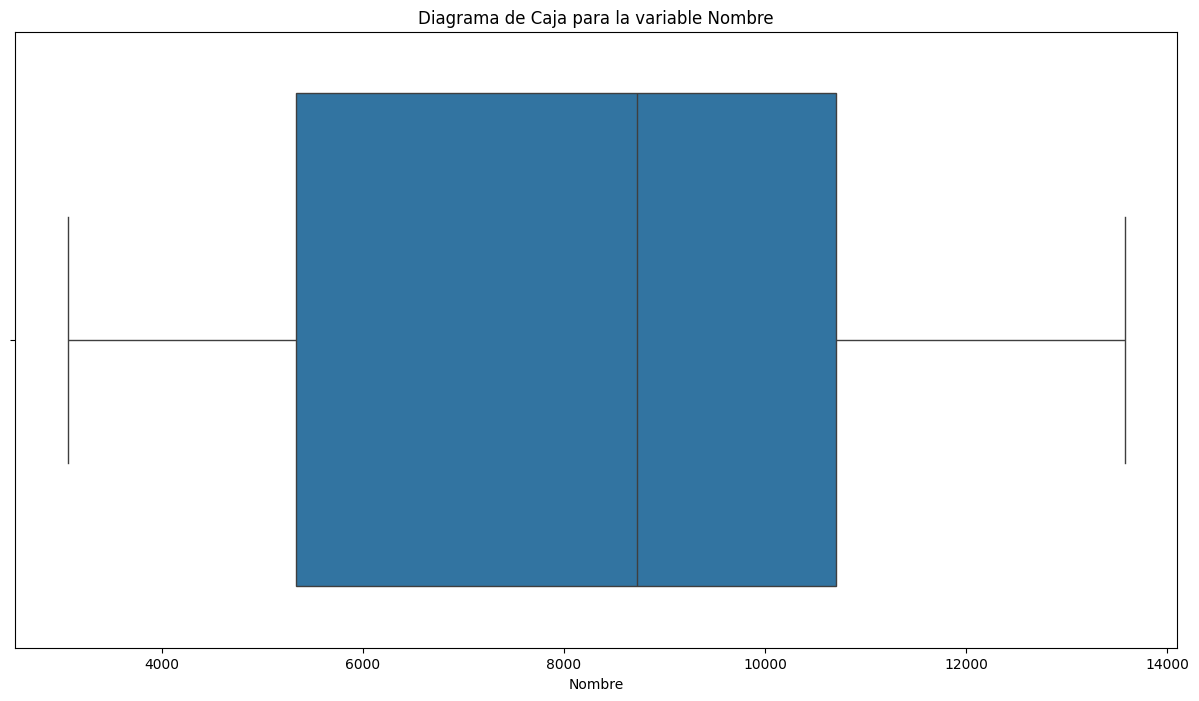

In [117]:
# Crear diagrama de caja para la variable continua Nombre
plt.figure(figsize=(15, 8))
sns.boxplot(data=datosAturAgrup, x='Nombre')
plt.title('Diagrama de Caja para la variable Nombre')

# Mostrar el diagrama de caja
plt.show()

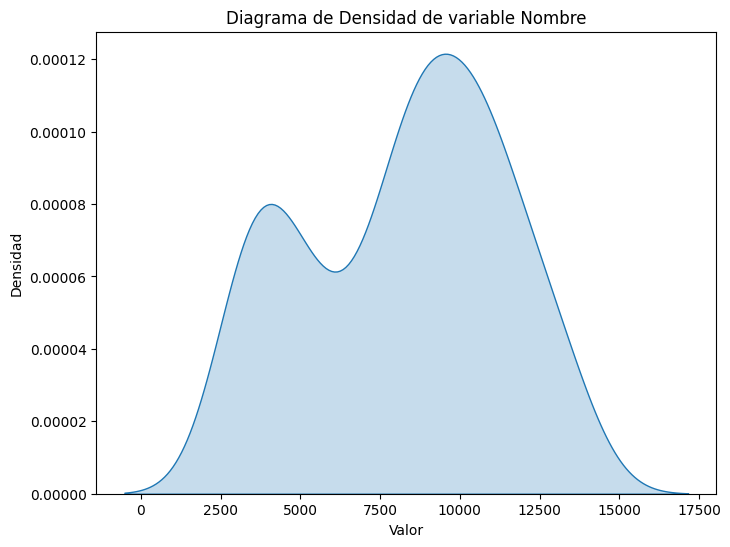

In [118]:
# Crear diagrama de densidad
plt.figure(figsize=(8, 6))
sns.kdeplot(datosAturAgrup['Nombre'], fill=True)
plt.title('Diagrama de Densidad de variable Nombre')
plt.xlabel('Valor')
plt.ylabel('Densidad')

# Mostrar el diagrama de densidad
plt.show()

In [141]:


# Cargar el archivo shapefile de los distritos de Barcelona
barcelona_distritos = gpd.read_file("/content/drive/MyDrive/UOC/TFM/Datasets Indicadores/Grafo viario de las calles de la ciudad de Barcelona/BCN_UNITATS_ADM/0301040100_Districtes_UNITATS_ADM.shp")

# Mostrar información básica sobre el shapefile
print("Información del shapefile:")
barcelona_distritos.head()


Información del shapefile:


,ID_ANNEX,ANNEXDESCR,ID_TEMA,TEMA_DESCR,ID_CONJUNT,CONJ_DESCR,ID_SUBCONJ,SCONJ_DESC,ID_ELEMENT,ELEM_DESCR,...,ESTIL_ID_V,ESTIL_QGIS,VALOR1QGIS,VALOR2QGIS,COL_FARCIT,FCOL_DESCR,FHEX_COLOR,COL_DESCR,HEX_COLOR7,geometry
0,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((431733.736 4582441.816, 431827.673 4..."
1,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((432033.184 4583665.032, 432032.069 4..."
2,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((428773.911 4580873.742, 428833..."
3,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"POLYGON ((425054.670 4583672.560, 425062.830 4..."
4,01,Grup - I,0104,Unitats Administratives,010412,Districtes,01041201,Districte,0104120101,LÃ­mit de districte,...,0,SÃ²lid,0,0,1,Negre,#000000,Negre,#000000,"MULTIPOLYGON (((422563.071 4587486.743, 422568..."


In [127]:
barcelona_distritos['DISTRICTE'] = barcelona_distritos['DISTRICTE'].astype(int)

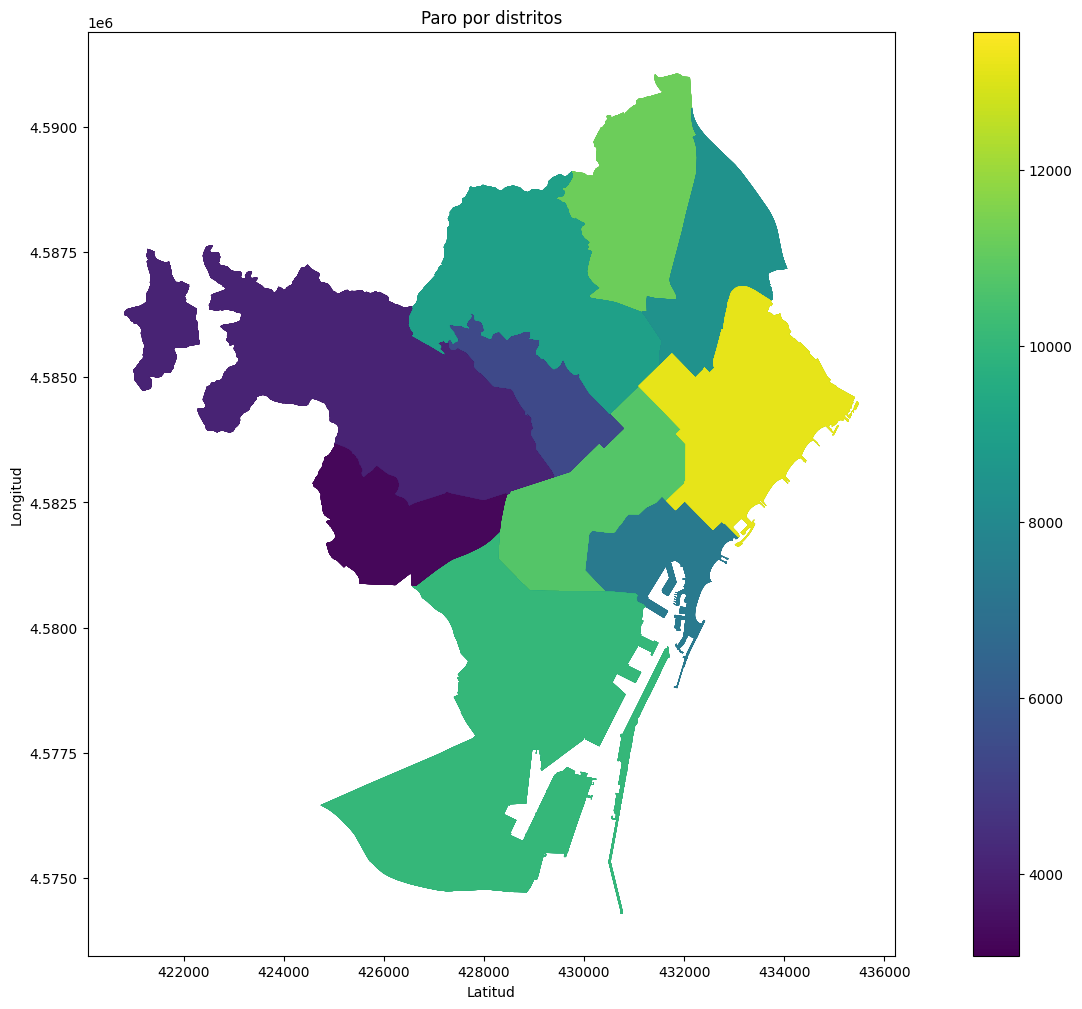

In [139]:
# Combinar datos CSV y Shapefile
merged_data = barcelona_distritos.merge(datosAturAgrup, how='left', left_on='DISTRICTE', right_on='Codi_Districte')

# Graficar
fig, ax = plt.subplots(1, 1,figsize=(20, 12))
barcelona_distritos.plot(ax=ax, color='lightgrey')  # Graficar el Shapefile
merged_data.plot(ax=ax, column='Nombre', cmap='viridis', legend=True)  # Graficar los datos combinados

plt.title('Paro por distritos')
plt.xlabel('Latitud')
plt.ylabel('Longitud')
plt.show()